In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
# Load and preprocess the data
train_dir = "D:/OneDrive/Desktop/Fire-Detection"
test_dir = "D:/OneDrive/Desktop/dataset"
batch_size = 48

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 965 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


In [25]:

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [50]:
# Train the model
epochs = 15
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

Epoch 1/15
20/20 [==============================] - 65s 3s/step - loss: 0.3069 - accuracy: 0.8670 - val_loss: 0.2707 - val_accuracy: 0.8958
Epoch 2/15
20/20 [==============================] - 62s 3s/step - loss: 0.2993 - accuracy: 0.8648 - val_loss: 0.3101 - val_accuracy: 0.8646
Epoch 3/15
20/20 [==============================] - 63s 3s/step - loss: 0.2986 - accuracy: 0.8550 - val_loss: 0.4664 - val_accuracy: 0.7969
Epoch 4/15
20/20 [==============================] - 64s 3s/step - loss: 0.2892 - accuracy: 0.8746 - val_loss: 0.2928 - val_accuracy: 0.8698
Epoch 5/15
20/20 [==============================] - 65s 3s/step - loss: 0.2862 - accuracy: 0.8909 - val_loss: 0.4582 - val_accuracy: 0.7865
Epoch 6/15
20/20 [==============================] - 62s 3s/step - loss: 0.3039 - accuracy: 0.8626 - val_loss: 0.4067 - val_accuracy: 0.7969
Epoch 7/15
20/20 [==============================] - 61s 3s/step - loss: 0.2835 - accuracy: 0.8800 - val_loss: 0.2424 - val_accuracy: 0.8854
Epoch 8/15
20/20 [==

In [51]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(test_generator)
print("Validation Loss: ", loss)
print("Validation Accuracy: ", accuracy)

5/5 [==============================] - 3s 606ms/step - loss: 0.3981 - accuracy: 0.7990
Validation Loss:  0.3980807662010193
Validation Accuracy:  0.7990430593490601


In [52]:
# Save the model as TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\Nusla\AppData\Local\Temp\tmp31g2rnac\assets


INFO:tensorflow:Assets written to: C:\Users\Nusla\AppData\Local\Temp\tmp31g2rnac\assets


In [53]:
# Save the TFLite model to a file
with open('fire_detection.tflite', 'wb') as f:
    f.write(tflite_model)
    

In [58]:
# Test the model on new images
test_image = tf.keras.preprocessing.image.load_img("D:/OneDrive/Desktop/fire_dataset/non_fire_images/non_fire.115.png", target_size=(224, 224))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
global indication  
if result[0][0] > 0.5:
    indication=True
    
else:
    indication=False
     
indication

1/1 [==============================] - 0s 31ms/step


False

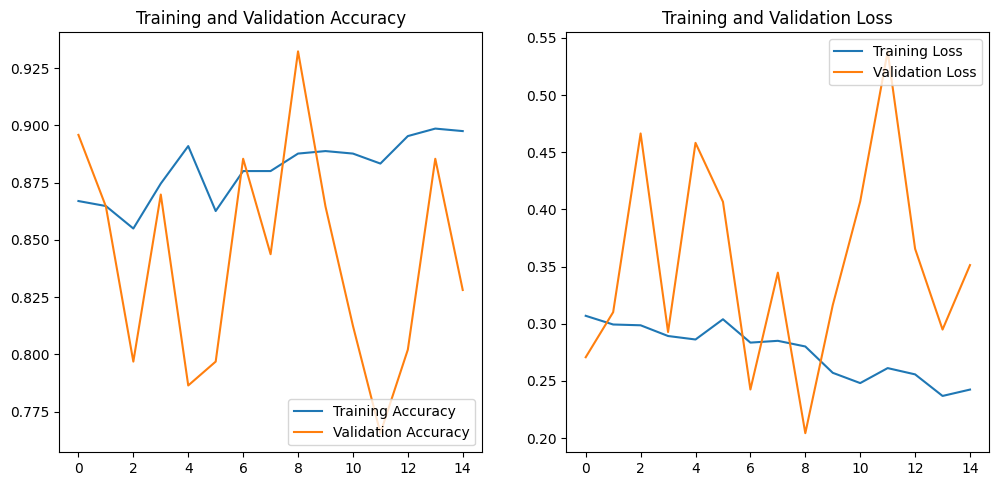

In [60]:
# Visualize the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()